In [64]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [65]:
Data = pd.read_csv('C:/Users/Moonwar/Desktop/CSE475/CSE475/heart.csv')

In [66]:
print( 'Shape of DataFrame: {}'.format(Data.shape))
print (Data.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


In [67]:
data.loc[:20]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [68]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


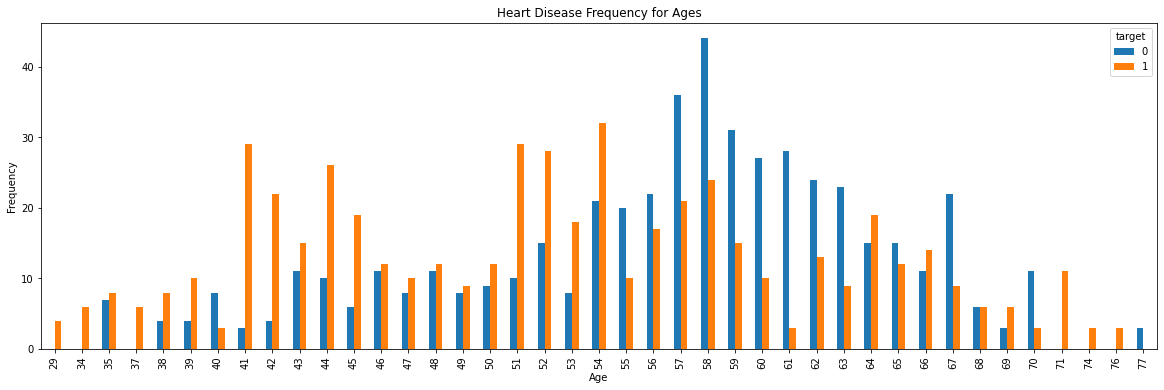

In [69]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

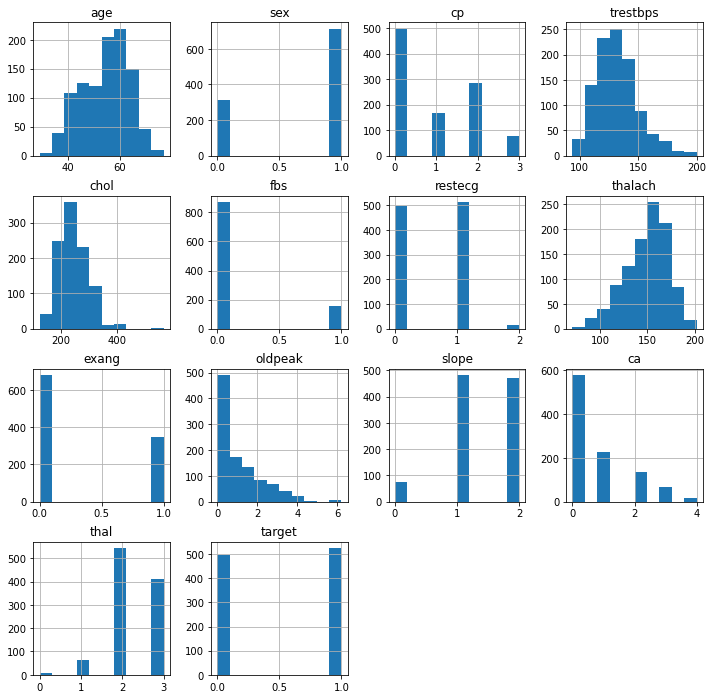

In [71]:
data.hist(figsize = (12, 12))
plt.show()

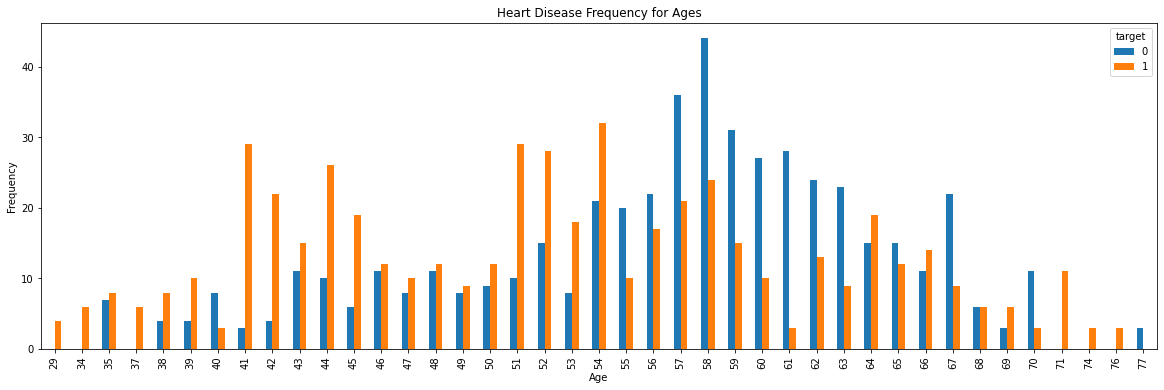

In [72]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

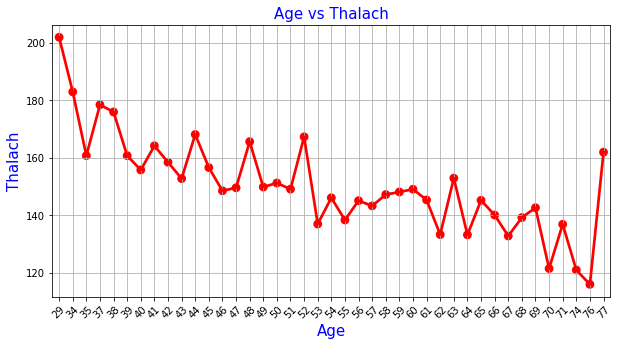

In [74]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [75]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

In [76]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [77]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [78]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


In [79]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                224       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Moonwar\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [80]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=150, batch_size=10)

Epoch 1/150
82/82 [==============================] - 1s 5ms/step - loss: 0.6722 - accuracy: 0.6951 - val_loss: 0.6327 - val_accuracy: 0.8049
Epoch 2/150
82/82 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.8073 - val_loss: 0.4930 - val_accuracy: 0.8341
Epoch 3/150
82/82 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8317 - val_loss: 0.4083 - val_accuracy: 0.8293
Epoch 4/150
82/82 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8427 - val_loss: 0.3717 - val_accuracy: 0.8293
Epoch 5/150
82/82 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8549 - val_loss: 0.3527 - val_accuracy: 0.8439
Epoch 6/150
82/82 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8646 - val_loss: 0.3400 - val_accuracy: 0.8488
Epoch 7/150
82/82 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8622 - val_loss: 0.3352 - val_accuracy: 0.8488
Epoch 8/150
8

Epoch 59/150
82/82 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.9195 - val_loss: 0.2775 - val_accuracy: 0.9073
Epoch 60/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.9000 - val_loss: 0.2761 - val_accuracy: 0.9268
Epoch 61/150
82/82 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8878 - val_loss: 0.2760 - val_accuracy: 0.9122
Epoch 62/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9098 - val_loss: 0.2750 - val_accuracy: 0.9171
Epoch 63/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.9073 - val_loss: 0.2768 - val_accuracy: 0.9317
Epoch 64/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8976 - val_loss: 0.2765 - val_accuracy: 0.9220
Epoch 65/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9012 - val_loss: 0.2821 - val_accuracy: 0.9122
Epoch 

82/82 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9232 - val_loss: 0.2533 - val_accuracy: 0.9366
Epoch 117/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9183 - val_loss: 0.2554 - val_accuracy: 0.9317
Epoch 118/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9220 - val_loss: 0.2547 - val_accuracy: 0.9317
Epoch 119/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9341 - val_loss: 0.2545 - val_accuracy: 0.9317
Epoch 120/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9293 - val_loss: 0.2549 - val_accuracy: 0.9317
Epoch 121/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9073 - val_loss: 0.2497 - val_accuracy: 0.9366
Epoch 122/150
82/82 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9268 - val_loss: 0.2464 - val_accuracy: 0.9415
Epoch 123/150

In [81]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

<ipython-input-82-c44446242725>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


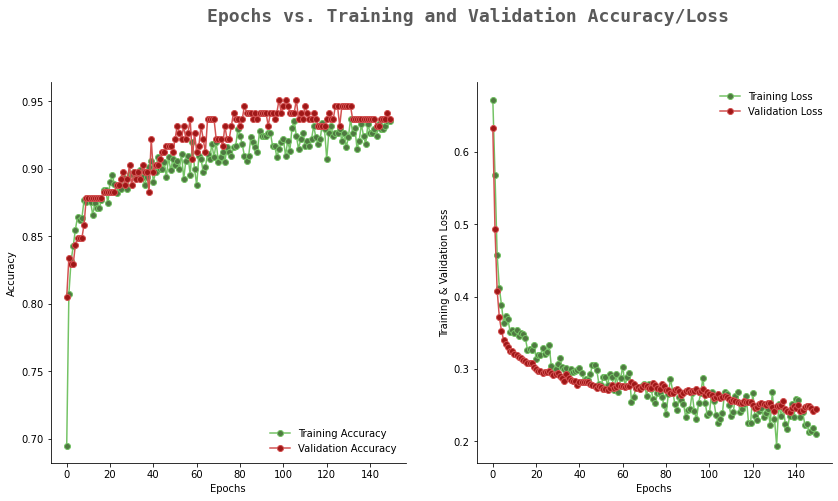

In [82]:
epochs = [i for i in range(150)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [88]:
from sklearn.metrics import classification_report, accuracy_score
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Binary Model Result')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Binary Model Result
0.9365853658536586
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.93      0.94      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

